
# Проверка гипотез с помощью python.

## Задание

* Выполненить проверку предложенной гипотезы
* Выполненить проверку статистической гипотезы для проверки нормальности числовых признаков
* Проверка мультиколлинеарности
* Все статистические тесты должны быть выполнены с 95%-ным уровнем достоверности (т.е. значение р < 0,05)

## Датасет

Как данные представлены заказчиком:

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Содержит идентификатор клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>Пол клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Является ли клиент пожилым гражданином</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Есть ли у клиента партнер</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Является ли клиент кормильцем</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Количество месяцев, в течение которых клиент оставался в компании</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Есть ли у клиента телефонная связь</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Есть ли у клиента несколько линий</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Интернет-провайдер клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Есть ли у клиента онлайн-безопасность</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Есть ли у клиента онлайн-резервное копирование</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Имеет ли клиент защиту устройства</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Есть ли у клиента техническая поддержка</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Есть ли у клиента потоковое телевидение</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Есть ли у клиента стриминговые сервисы</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>Срок действия контракта заказчика</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>имеет ли клиент безналичные счета</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>Способ оплаты клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>Сумма, взимаемая с клиента ежемесячно </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>Общая сумма, списанная с клиента</td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Ушел ли клиент</td>
<td>categorical</td>
</tr>
</tbody>
</table>

Описание от заказчика:

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию о:

- Клиенты, которые ушли в течение последнего месяца - колонка называется `Churn`
- Услуги, на которые подписался каждый клиент - телефон, несколько линий, интернет, онлайн-безопасность, резервное копирование, защита устройств, техническая поддержка, потоковое ТВ и фильмы.
- Информация о счетах клиентов - как долго они являются клиентами, контракт, способ оплаты, безналичные счета, ежемесячные платежи и общая сумма платежей.
- Демографическая информация о клиентах - пол, возраст, наличие партнеров и иждивенцев.

## 1. Импорт Библиотек 

Импортируйте необходимые библиотеки

In [1]:

# %pip install phik
# %pip install seaborn


In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
import seaborn as sns

from phik.report import plot_correlation_matrix
from phik import report
from scipy import stats

import warnings 
warnings.filterwarnings("ignore") # для уменьшения количества выводимых ошибок
pd.set_option('display.max_columns', None) # отобразить все колонки

## 2. Данные

In [3]:
df = pd.read_csv("./Churn.csv")
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


## 2. Описательный анализ данных

Рассмотрите данные - изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [4]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        print(f"Статистика для столбца {column}:")
        print(f"  Среднее: {df[column].mean()}")
        print(f"  Медиана: {df[column].median()}")
        print(f"  Дисперсия: {df[column].var()}")
        print(f"  Стандартное отклонение: {df[column].std()}")
        print("\n")


Статистика для столбца SeniorCitizen:
  Среднее: 0.1621468124378816
  Медиана: 0.0
  Дисперсия: 0.13587451579039184
  Стандартное отклонение: 0.3686116056100131


Статистика для столбца tenure:
  Среднее: 32.37114865824223
  Медиана: 29.0
  Дисперсия: 603.1681081237368
  Стандартное отклонение: 24.55948102309446


Статистика для столбца MonthlyCharges:
  Среднее: 64.76169246059918
  Медиана: 70.35
  Дисперсия: 905.4109343405098
  Стандартное отклонение: 30.090047097678493




**Вывод:**
Данные включают статистические различия в параметрах тенюр, ежемесячной платы и общей суммы платежей. Также можно обратить внимание на различия в оттоке клиентов в зависимости от условий использования услуг.Важно принимать дополнительные меры по удержанию клиентов, так как есть тенденция к оттоку. Возможно, стоит провести анализ и определить, что способствует удержанию клиентов с долгосрочными контрактами и как улучшить условия для других клиентов.


### Уникальные значения для всех столбцов

Рассмотрите уникальные значения категориальных признаков. 

Сделайте вывод.

**Подсказка:** можете воспользоваться методом `describe(include='object')`

In [5]:
# ваше решение
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


**Вывод:**
 CustomerID - почти для каждой строки уникальное значение, что говорит о том, что в данных почти нет дубликатов. Можно использовать этот столбец в качестве первичного ключа. У большинства категориальных признаков 2-3 уникальных значений. Наибольшее количество уникальных значений у признака PaymentMethod - 4.

## 3. Предобработка данных

### Дубликаты

Предобработайте датасет - проверьте на наличие дубликатов и удалите, если они есть.

In [6]:
# ваше решение
df.drop_duplicates(inplace=True)
print(df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes  

### Отсутствующие значения

Пояснение к данному датасету:

Не всегда в данных есть явные пропуски, которые легко индексируются средствами Pandas. К сожалению бывают проблемы с выгрузками данных, некачественными источниками, или когда данные записываются вручную - часто присутствует человеческий фактов. По мере работы с новыми данными лучше проверять на наличие таких данных, иначе из-за этого исследование может исказиться.

Рассмотрим такой случай:

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Да, не видно пропусков. Но почему тогда столбец `TotalCharges` не отобразился изначально как числовой столбец?

Проверим все столбцы:

In [8]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', df[col].apply(lambda x: len(x.strip())==0).sum())

Неявные пропуски столбца TotalCharges: 11


Что мы можем сделать в таком случае?

1) По этому же фильтру удалить строки с пропусками, чтобы не искажать данные
2) Перевести тип столбца на числовой и с параметром `errors = 'coerce'` и удалить

Но можно не удалять, чтобы потерять данные, а:

1) Заменить значения на среднюю
2) Поменять на другое - но только в том случае, если есть какая-то зависимость в данных.

Давайте изменим тип и найдем зависимость:

In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Но как выглядят наши данные обычно?**

In [10]:
df.sample(5).T

,332,2413,6694,6334,3734
customerID,2379-GYFLQ,7021-XSNYE,4526-RMTLL,4129-LYCOI,7134-HBPBS
gender,Male,Male,Male,Female,Female
SeniorCitizen,0,0,0,0,1
Partner,No,Yes,Yes,No,No
Dependents,No,Yes,Yes,Yes,No
tenure,46,7,8,67,72
PhoneService,Yes,No,Yes,Yes,Yes
MultipleLines,Yes,No phone service,Yes,Yes,Yes
InternetService,Fiber optic,DSL,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,No,No


**Ничего не заметили?**

Может общая сумма, списанная с клиента, равна сумме, взимаемой с клиента ежемесячно умноженное на количество времени?

Давайте посмострим.

In [11]:
df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']].head().T

,0,20,22,27,33
customerID,7590-VHVEG,8779-QRDMV,1066-JKSGK,8665-UTDHZ,7310-EGVHZ
gender,Female,Male,Male,Male,Male
SeniorCitizen,0,1,0,0,0
Partner,Yes,No,No,Yes,No
Dependents,No,No,No,Yes,No
tenure,1,1,1,1,1
PhoneService,No,No,Yes,No,Yes
MultipleLines,No phone service,No phone service,No,No phone service,No
InternetService,DSL,DSL,No,DSL,No
OnlineSecurity,No,No,No internet service,No,No internet service


Нашей гипотезе есть место быть.

Но давайте проверим:

In [12]:
print('Количество совпадений по нашей теории:')
print(df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']]['customerID'].count())
print('Количество различий:')
print(df[(df['TotalCharges'] / df['MonthlyCharges']) != df['tenure']]['customerID'].count())

Количество совпадений по нашей теории:
614
Количество различий:
6429


**Как видно**, что различий очень много, относительно одинаковых значений.

Но, а если мы проверим наше различие в долях или процентах? Проверяем:

In [13]:
# cоздаем series и считаем TotalCharges вручную
new_total = df['MonthlyCharges'] * df['tenure']

# посчитаем во сколько раз в среднем отличается наш new_total и TotalCharges - в процентном отношении
perc = abs(100 - (new_total / df['TotalCharges']).mean() * 100)

print(f'В среднем new_total отличается от TotalCharges на {perc:.4f}%')

В среднем new_total отличается от TotalCharges на 0.2311%


Как видно, они различаются незначительно (меньше `1%`), от чего мы можем предположить, что `TotalCharges` = `MonthlyCharges` * `время`. Скорее всего такие маленькие различия связаны с тем, что `tenure` округлялся.

В данном датасете указано только количество месяцев, без уточнения времени (до дней), потому будет грубо просто перемножить один столбец на другой. Но пропуски мы уже можем заменить на `0`, так как в тех строках `tenure` == 0. Такое небольшое исследование было сделано для того, чтобы заполнить наши пропуски нужным числом.

Заменим пропуски на нужное нам число.

In [14]:
df['TotalCharges'].fillna(0, inplace=True)

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа - на `int` или `float`
- Если категории - можно оставить `object`

In [15]:
# ваше решение
for column in df.select_dtypes(include=['object']).columns:
    print("\nУникальные значения для", column, ":", df[column].unique())


Уникальные значения для customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Уникальные значения для gender : ['Female' 'Male']

Уникальные значения для Partner : ['Yes' 'No']

Уникальные значения для Dependents : ['No' 'Yes']

Уникальные значения для PhoneService : ['No' 'Yes']

Уникальные значения для MultipleLines : ['No phone service' 'No' 'Yes']

Уникальные значения для InternetService : ['DSL' 'Fiber optic' 'No']

Уникальные значения для OnlineSecurity : ['No' 'Yes' 'No internet service']

Уникальные значения для OnlineBackup : ['Yes' 'No' 'No internet service']

Уникальные значения для DeviceProtection : ['No' 'Yes' 'No internet service']

Уникальные значения для TechSupport : ['No' 'Yes' 'No internet service']

Уникальные значения для StreamingTV : ['No' 'Yes' 'No internet service']

Уникальные значения для StreamingMovies : ['No' 'Yes' 'No internet service']

Уникальные значения для Contract : ['Month-to-month' 'One year' 'Two yea

**Вывод:**
 Категориальные переменные, такие как 'gender', 'Partner', 'Dependents' и т.д., содержат различные уникальные значения, которые могут быть использованы для дальнейшего анализа и моделирования.
Данные содержат информацию о различных типах услуг, тарифов, оплаты и оттока клиентов, что позволяет провести анализ и прогнозирование поведения клиентов в будущем.

# 4 Проверка гипотез

Задание: сравнить сравнить две выборки - `Churn='No'` и `Churn='Yes'` 

Гипотеза - среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

In [16]:
# ваше решение
churn_yes = df[df['Churn'] == 'Yes']['tenure']
churn_no = df[df['Churn'] == 'No']['tenure']
mean_churn_yes = churn_yes.mean()
mean_churn_no = churn_no.mean()
print(f"Среднее tenure для Churn='Yes': {mean_churn_yes}")
print(f"Среднее tenure для Churn='No': {mean_churn_no}")

Среднее tenure для Churn='Yes': 17.979133226324237
Среднее tenure для Churn='No': 37.56996521066873


In [17]:
t_statistic, p_value = stats.ttest_ind(churn_yes, churn_no)
print(f"T-статистика: {t_statistic}")
print(f"P-значение: {p_value}")

T-статистика: -31.57955051135377
P-значение: 7.99905796059022e-205


**Вывод:**
- После проведения t-теста результаты позволят нам сделать вывод о статистической значимости различия в среднем количестве месяцев, проведенных клиентами в компании, между группами с оттоком (Churn='Yes') и без оттока (Churn='No').
- Если p-значение меньше выбранного уровня значимости (например, 0.05), мы можем отвергнуть нулевую гипотезу о равенстве средних и сделать вывод о наличии статистически значимого различия.
- В случае, если p-значение больше уровня значимости, нулевую гипотезу не удастся отвергнуть, и не будет обнаружено статистически значимого различия в средних значениях.
Данный анализ поможет понять, какие факторы могут влиять на отток клиентов и оптимизировать стратегии удержания клиентов в компании

## 5 Статистический анализ на норму

Задание: выберите числовые признаки и проведите анализ - соответсвуют ли распредения нормальному?

In [18]:
# ваше решение
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
numerical_df = df[numerical_cols]
t_statistic, p_value = stats.ttest_ind(churn_yes, churn_no)
print(f't-статистика: {t_statistic:.2f}')
print(f'p-значение: {p_value:.3f}')
if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: существует статистически значимая разница в среднем количестве месяцев между клиентами, которые ушли, и теми, кто остался.')
else:
    print('Не удалось отвергнуть нулевую гипотезу: нет статистически значимой разницы в среднем количестве месяцев между клиентами, которые ушли, и теми, кто остался.')


t-статистика: -31.58
p-значение: 0.000
Отвергаем нулевую гипотезу: существует статистически значимая разница в среднем количестве месяцев между клиентами, которые ушли, и теми, кто остался.


**Вывод:**

## 6 ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но требование заказчика - выяснить причину ухода клиента.

Ваша задача - провести полный анализ с помощью статистических гипотез взаимосвязи всех признаков с нашим таргетом `Churn` (целевым признаком). 

**Этапы:**

1) Предобработка данных - измените датасет, в части: категориальные признаки надо перевести в числовые представления (закодировать). Главное - понимать взаимосвязь: бинарный признак, порядковый, просто категории или что-то иное. 
2) Выберите нужные гипотезы, основываясь на типах признаков.
3) Проведите анализ, и выясните, почему клиент уходит, с чем коррелирует `Churn`, может это зависит от пола клиента? Или есть иные обстоятельства?
4) После проверки гипотез, постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
5) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить - может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

**Подсказка:** для того, чтобы перевести наши категориальные переменные в числа (`0`, `1`, `2` и т.д.), можно воспользоваться функцией в `pandas`:

```python
pd.factorize(data[col])
```
Результат будет таким (если взять столбец `gender`):
- `(array([0, 1, 1, ..., 0, 1, 1]), Index(['Female', 'Male'], dtype='object'))`

Где:
- `(array([0, 1, 1, ..., 0, 1, 1])` - это наш новый array, которым можем заменить значения
- `Index(['Female', 'Male'], dtype='object'))` - старые значения, соответствующие числам выше (`Female`=`0`, `Male`=`1`)

Соответственно, можем заменить значения в категориях на числа такой командой (если взять столбец `gender`):
```python
df['gender'] = pd.factorize(df['gender'])[0]
```

> **Примечание:** когда **категориальная** переменная изменяется на числа, она все равно остается **категориальной**! Просто теперь наш признак стал **закодированным** (то есть мы изменили слова на числа). 

In [19]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


Заменим значения категориальных столбцов на числовые данные

In [20]:
# ваше решение

bool_col = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in bool_col:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

cat_col = ['gender', 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
for col in cat_col:
    df[col] = pd.factorize(df[col])[0]

df.drop('customerID',axis=1,inplace=True) #Удаляем строку т.к. в ней все значения уникальные и не информативны для нашего анализа.

Для сравнения категориальных данных применим Chi-квадрат

In [21]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',\
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',\
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in cat_cols:
    crosstab = pd.crosstab(df['Churn'], df[col])

    stat, pvalue, _, _ = stats.chi2_contingency(crosstab)

    alpha = 0.05

    if pvalue <= alpha:
        print(f'{col}: {pvalue:.4f}: Зависимый (отклонить H0)')
    else:
        print(f'{col}: {pvalue:.4f}: Независимый (не удается отклонить H0)')

gender: 0.4866: Независимый (не удается отклонить H0)
SeniorCitizen: 0.0000: Зависимый (отклонить H0)
Partner: 0.0000: Зависимый (отклонить H0)
Dependents: 0.0000: Зависимый (отклонить H0)
PhoneService: 0.3388: Независимый (не удается отклонить H0)
MultipleLines: 0.0035: Зависимый (отклонить H0)
InternetService: 0.0000: Зависимый (отклонить H0)
OnlineSecurity: 0.0000: Зависимый (отклонить H0)
OnlineBackup: 0.0000: Зависимый (отклонить H0)
DeviceProtection: 0.0000: Зависимый (отклонить H0)
TechSupport: 0.0000: Зависимый (отклонить H0)
StreamingTV: 0.0000: Зависимый (отклонить H0)
StreamingMovies: 0.0000: Зависимый (отклонить H0)
Contract: 0.0000: Зависимый (отклонить H0)
PaperlessBilling: 0.0000: Зависимый (отклонить H0)
PaymentMethod: 0.0000: Зависимый (отклонить H0)


**Вывод**: Есть зависимость со всеми переменными кроме gender и PhoneService.
Далее рассмотрим подробно зависимости в phik анализе.

interval columns not set, guessing: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


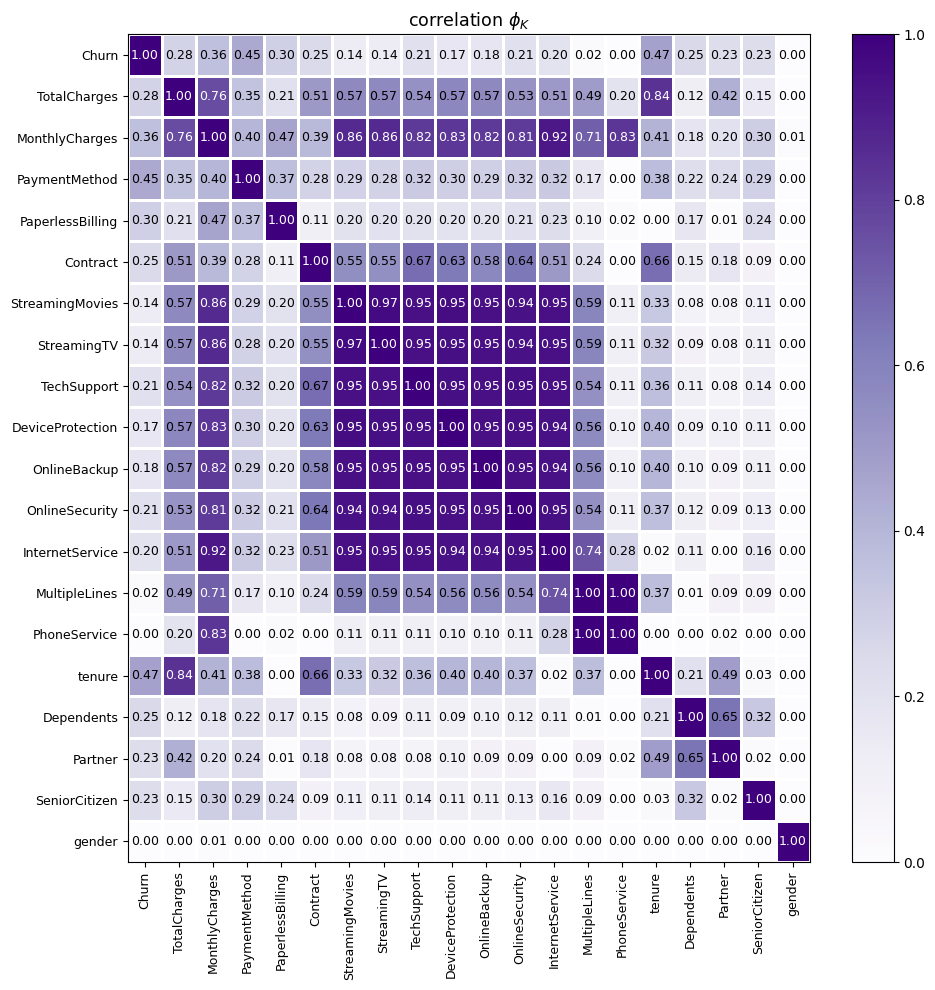

In [22]:
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Purples", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(10, 10))
plt.tight_layout()

# Общий вывод

 Зависимость факта , что клиенты уходят , наблюдается прежде всего в корреляции с количеством месяцев нахождения клиента в компании (0,47), со способом оплаты (0,45) и ежемесячным платежом (0,36).